# Tasks 2020
### [ Machine Learning and Statistics Module GMIT 2020 ]
---

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents
* [Task 1: Calculate square root of 2 to 100 decimal places](#task1)
* [Task 2: Verify the Chi-squared value](#task2)
* [Task 3: Standard deviation in Microsoft Excel: STDEV.P vs  STDEV.S](#task3)
* [Task 4](#task4)

---

### __TASK 1__: Calculate square root of 2 to 100 decimal places <a name="task1"></a>

<img align="left" width="200" height="200" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/A_First_Letter_Square_root_of_2.svg/1280px-A_First_Letter_Square_root_of_2.svg.png">


To calculate the square root, we can use _Digit-by-digit calculation of principal roots of decimal numbers_ [1] with binary shift operations [2].

$$ x_n = x + floor(\frac{a}{x}) >> 1 $$

The above approach finds an **integer** of the square root of $a$ to $n$ number of digits (in order to override limitation of floating point precision in Python).

For this to work we need to consider $a$ as below [3]:

$$ a = a * (10^{2*n})$$

After we have recieved the integer of the square root we covert it so we can place the decimal point at the right location [4]

> 1. Wikipedia: Methods of computing square roots: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10)
2. Wikipedia: Integer square root: https://en.wikipedia.org/wiki/Integer_square_root#Digit-by-digit_algorithm
3. The On-Line Encyclopedia of Integer Sequences: Prime sieve of the square root of 2: https://oeis.org/A248831
4. Stack Overflow: How to add commas at required positions in the given string: https://stackoverflow.com/questions/47751102/how-to-add-commas-at-required-positions-in-the-given-string-in-python

In [1]:
def sqrt2(a=2, digits=100):
    """
    Function that calculates a square root of 2 to 100 decimal places
    """
    # Raising 2 in order to get an integer instead of a float in the result
    a = a * (10**(2*digits))
    x = 0
    # Initial guess for the root
    x_next = 1 * (10**digits)
    # Loop until it reaches requested number of digits
    while x != x_next:
        x = x_next
        # Calculate a better guess for the square root and shift the result one diggit to the right
        x_next = (x + (a // x)) >> 1
    # Converting integer to a list
    x_next = list(str(x_next))
    # Add the decimal point at the correct location
    for i, j in enumerate([1]):
         x_next.insert(i + j, '.')
    # Join list into one string
    print(''.join(x_next))

<br>

#### Test of the function
Below is the test of the above function.

In [2]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


***

<br>

### __TASK 2__: Verify the Chi-squared value <a name="task2"></a>

<br>

<img align="left" width="150" height="150" src="https://images-na.ssl-images-amazon.com/images/I/61B6FqgRKJL.png">

<br>

Consider the table below:

 * | A | B | C | D | total
:-- | :-- | :-- | :-- | :-- | :--
White collar | 90 | 60 | 104 | 95 | 349
Blue collar	| 30 | 50 | 51 | 20 | 151
No collar | 30 | 40 | 45 | 35 | 150
Total | 150 | 150 | 200 | 150 | 650

_where A, B, C, and D are four neighbourhoods;_

_"white collar", "blue collar", or "no collar" are occupation of randomly selected 650 residents._

This is an example of Chi-squared test for categorical data. The Chi-squared value based on the above table is approximately 24.6. [1] In order to verify this value and calculate the associated p value I will be using a function from [scipy.stats package](https://docs.scipy.org/doc/scipy/reference/stats.html) that computes a Chi-square test of independence of variables in a contingency table. [2]

> 1. [Wikipedia: Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test)
2. [SciPy: scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

<br>

#### General setup

In [3]:
# Efficient numerical arrays.
import numpy as np
# Data frames.
import pandas as pd
# Statistics.
import scipy.stats as ss
# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 11)

<br>

#### Simulate the example table

In [5]:
# Create a raw data identical to the example.
raw_data = [['White collar', 90, 60, 104, 95, 349],
            ['Blue collar', 30, 50, 51, 20, 151],
            ['No collar', 30, 40, 45, 35, 150],
            ['Total', 150, 150, 200, 150, 650]]  

# Create a data frame. 
df = pd.DataFrame(raw_data, columns=[' ', 'A', 'B', 'C', 'D', 'Total'])

# Display the data frame.
df

,,A,B,C,D,Total
0,White collar,90,60,104,95,349
1,Blue collar,30,50,51,20,151
2,No collar,30,40,45,35,150
3,Total,150,150,200,150,650


<br>

#### Plot the data.

In [6]:
# Separate the data frame by collars:
wc = df.loc[df.loc[:, ' '] == 'White collar']
bc = df.loc[df.loc[:, ' '] == 'Blue collar']
nc = df.loc[df.loc[:, ' '] == 'No collar']
total = df.loc[df.loc[:, ' '] == 'Total']

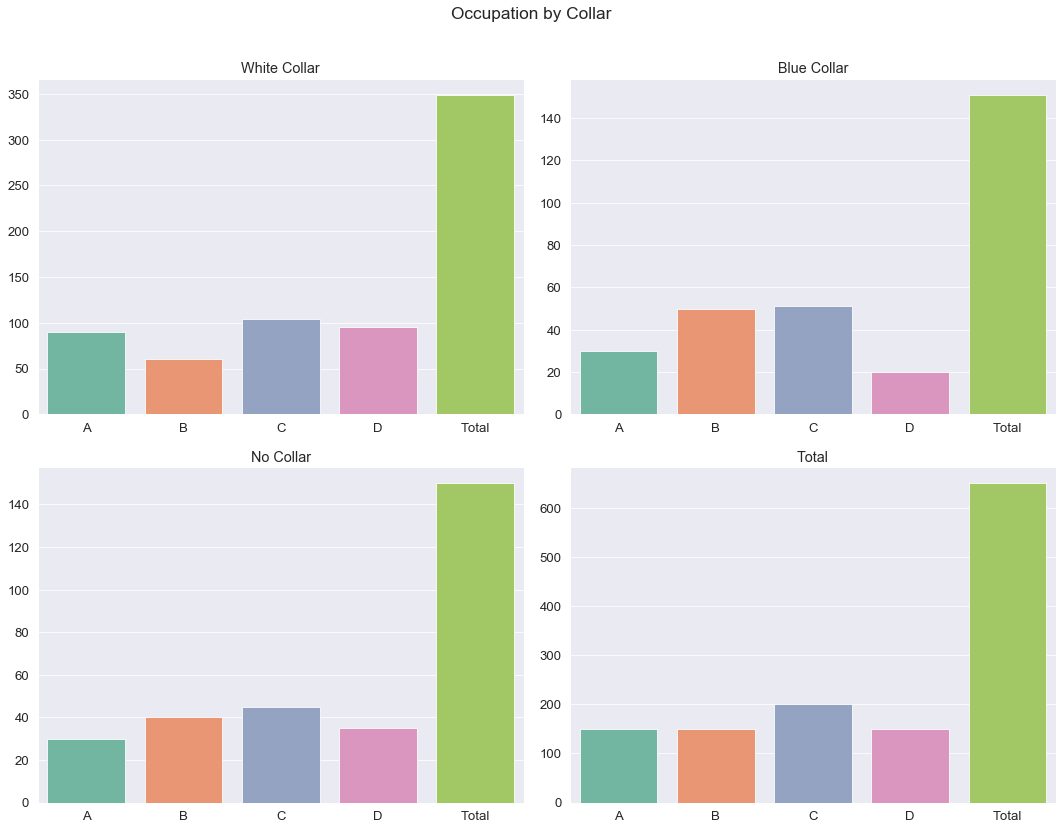

In [7]:
# Create 2x2 subplot.
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, sharey=False)
fig.suptitle("Occupation by Collar", y=1.05)

# Build plots for each collar.
sns.barplot(data=wc, ax=ax1).set_title('White Collar')
sns.barplot(data=bc, ax=ax2).set_title('Blue Collar')
sns.barplot(data=nc, ax=ax3).set_title('No Collar')
sns.barplot(data=total, ax=ax4).set_title('Total')

# Clean up whitespace padding.
fig.tight_layout()

# Display plots.
plt.show()

<br>

#### Perform Chi-square test

In [8]:
# Extract data from raw_data for each collar (dof = 6)
wc = raw_data[0][1:5]
bc = raw_data[1][1:5]
nc = raw_data[2][1:5]

# Create an array of observed data.
obs = np.array([wc,bc,nc])

# Run Chi-Square test.
chi_stat, p, dof, expctd = ss.chi2_contingency(obs)

In [9]:
print(f"Chi-squared value: {chi_stat}")
print(f"The associated p-value: {p}")

Chi-squared value: 24.5712028585826
The associated p-value: 0.0004098425861096696


#### Concussion

Based on the results of the test performed above the verification was successful and the Chi-squared value is approximately 24.6. Since the P-value (approximately 0.0004) and less than the significance level (0.5), it is statistically significant.

***

<br>
 
### __TASK 3__:  Standard deviation in Microsoft Excel: STDEV.P vs  STDEV.S <a name="task3"></a>

<br>

<img align="left" width="150" height="150" src="https://www.tech-recipes.com/wp-content/uploads/2019/05/excel.png">

Standard deviation is a measure of the amount of variation in a set of numbers compared to the mean (average) of the numbers. Microsoft Excel has a total of eight formaulas which calculate standard deviation according to varying priniciples. These formaulas are divided into two groups, with four in each group- _Population_ and _Sample_ - depending on whether they refer to an entire data set (population) or just a sample of it. Thus, "S" in **STDEV.S** represents a sample and "P" in **STDEV.P** - a population. [1] [2]

To further investigate the difference between the usage of STDEV.S vs STDEV.P formulas, we can consider the following example. Below we have data on choice of travel mode between Sydney and Melbourne, Australia. [3]

> 1. [Exceljet: Excel STDEV.P Function](https://exceljet.net/excel-functions/excel-stdev.p-function)
2. [Exceljet: Excel STDEV.S Function](https://exceljet.net/excel-functions/excel-stdev.s-function)
3. [Vincent Arel-Bundock's Github projects: R data sets: Data to Study Travel Mode Choice](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/ModeChoice.html)


<br>

#### General setup

In [10]:
# Drawing samples from normal distribution when plotting STD.
from scipy.stats import norm

<br>

#### Load the data set

In [11]:
# Load the data set.
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/TravelMode.csv")

# Display it.
df

,Unnamed: 0,individual,mode,choice,wait,vcost,travel,gcost,income,size
0,1,1,air,no,69,59,100,70,35,1
1,2,1,train,no,34,31,372,71,35,1
2,3,1,bus,no,35,25,417,70,35,1
3,4,1,car,yes,0,10,180,30,35,1
4,5,2,air,no,64,58,68,68,30,2
...,...,...,...,...,...,...,...,...,...,...
835,836,209,car,yes,0,27,510,82,20,1
836,837,210,air,no,64,66,140,87,70,4
837,838,210,train,no,44,54,670,156,70,4
838,839,210,bus,no,53,33,664,134,70,4


In [12]:
# Check for empty values.
df.isnull().values.any()

False

In [13]:
# Separate column Wait for analysis.
p = df['wait']
p.head()

0    69
1    34
2    35
3     0
4    64
Name: wait, dtype: int64

<br>

####  Plot the data

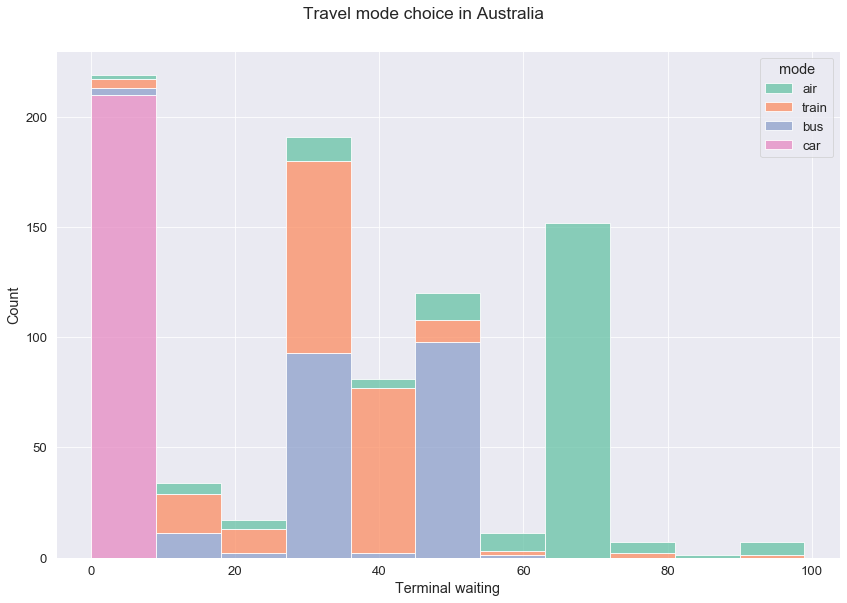

In [14]:
# Change the plot size.
plt.rcParams['figure.figsize'] = (12, 8)

# Plot the data.
fig, ax = plt.subplots()
fig.suptitle("Travel mode choice in Australia", y=1.05)
sns.histplot(data=df, x=p, multiple="stack", hue="mode", ax=ax).set_xlabel("Terminal waiting")

# Clean up whitespace padding.
fig.tight_layout()

# Display the plot.
plt.show()

<br>

#### Calculating Standard Deviation. 

<br>

The above data set is our population. We can calculate population standard deviation by using STDEV.P. Since it is taken as the standard deviation for every entry in the data set, even for minorities, it is called __Biased Analysis__.

In [15]:
# Simulate STDEV.P formula.
STDEVP = np.sqrt(np.sum((p - np.mean(p))**2)/len(p))
STDEVP

24.93375278736084

<br>

_Samples_.

Now let's consider that from 840 people who patricipated in the survey, we only measured waiting time for 5 people.

In [16]:
# Select a sample of 5 people
s1 = p.loc[:5]
s1

0    69
1    34
2    35
3     0
4    64
5    44
Name: wait, dtype: int64

<br>

The above sample is only a small fraction of the population. Therefore, the standard deviation using the STDEV.P formula is going to be inaccurate compared to the previous results.

In [17]:
# Perform STDEV.P on a sample
STDEVP_on_sample1 = np.sqrt(np.sum((s1 - np.mean(s1))**2)/len(s1))
STDEVP_on_sample1

22.686266036231405

<br> 

For this reason the STDEV.S formula exists. It is used on a small sample of the entire population, implementing Bessel's correction *(n-1)* where n is a number of samples arguments. This is called __Non-biassed analysis__ of standard deviation. [4]

> 4. [Exceltip: How to use the STDEV.S Function in Excel](https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html)

In [18]:
# Simulate STDEV.S formula 
STDEVS1 = np.sqrt(np.sum((s1 - np.mean(s1))**2)/(len(s1)-1))
STDEVS1

24.851559307214508

<br>
Now let's change the sample to 25 people and calculate our STDEVP and STDEVS on it.

In [19]:
# Select a sample of 25 people from the end of the data frame.
s2 = p.iloc[-25:]
s2

815     0
816    69
817    34
818    30
819     0
820    69
821    34
822    35
823     0
824    45
825    34
826    35
827     0
828    69
829    34
830    50
831     0
832    69
833    34
834    35
835     0
836    64
837    44
838    53
839     0
Name: wait, dtype: int64

In [20]:
STDEVP_on_sample2 = np.sqrt(np.sum((s2 - np.mean(s2))**2)/len(s2))
STDEVP_on_sample2

24.28352527949762

In [21]:
STDEVS2 = np.sqrt(np.sum((s2 - np.mean(s2))**2)/(len(s2)-1))
STDEVS2

24.784269204477265

<br>

#### Standard Deviation results. 

Considering the results above, we can now compare Standard deviation by plotting the results. [5]
>5. [Stackoverflow: python plot normal distribution](https://stackoverflow.com/questions/10138085/python-plot-normal-distribution)

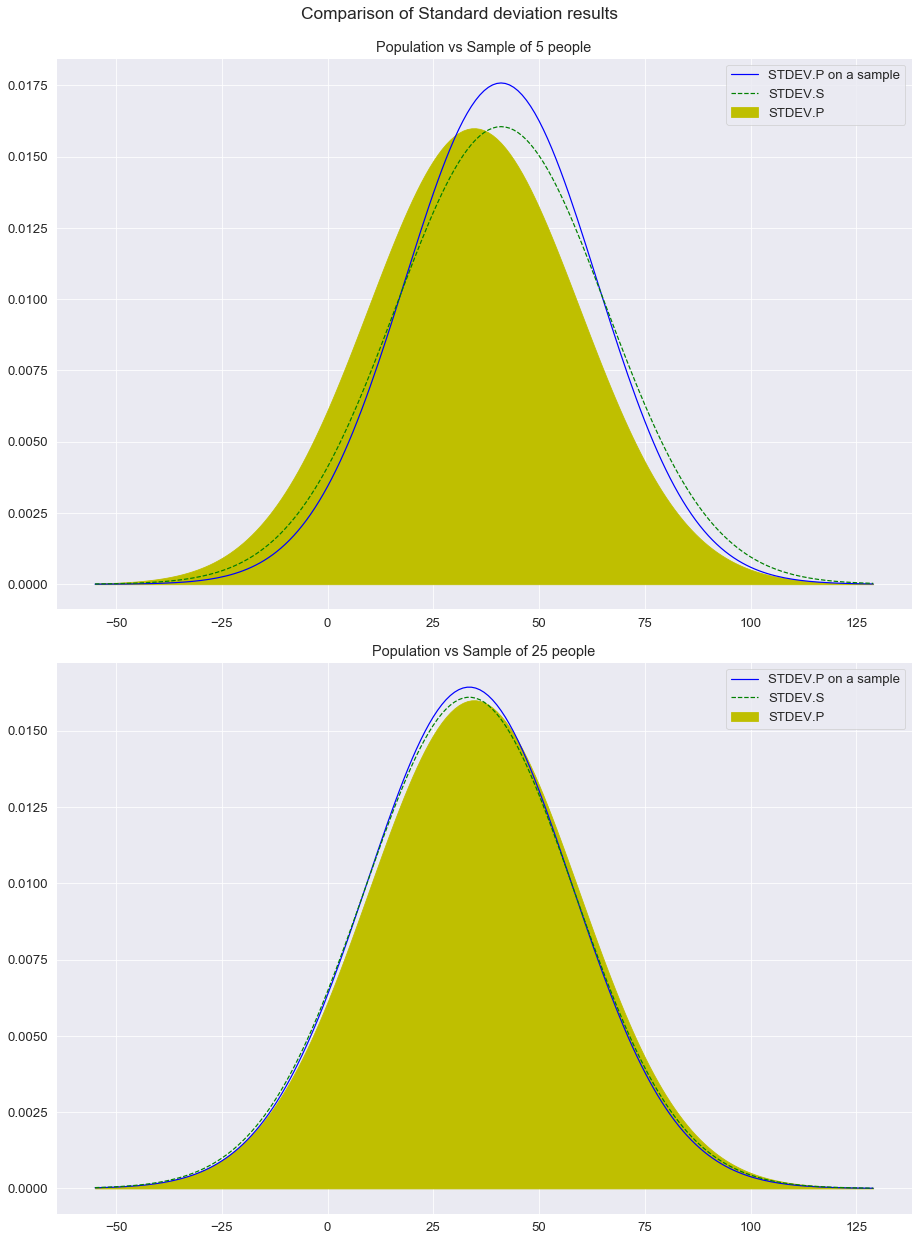

In [22]:
# Create the x axis.  
x_axis = np.arange(-55, 130)

# Change size for plots.
plt.rcParams['figure.figsize'] = (13, 17)

# Plot two plots one under the other.
fig, [ax1,ax2] = plt.subplots(2,1)
fig.suptitle("Comparison of Standard deviation results", y=1.015)

# Plot the standard deviation results.
# Sample 1.
ax1.fill_between(x_axis, norm.pdf(x_axis, np.mean(p),STDEVP), color="y", label="STDEV.P")
ax1.plot(x_axis, norm.pdf(x_axis, np.mean(s1),STDEVP_on_sample1), color="b", label="STDEV.P on a sample")
ax1.plot(x_axis, norm.pdf(x_axis, np.mean(s1),STDEVS1),color="g", linestyle='--', label="STDEV.S")
ax1.set_title("Population vs Sample of 5 people")
ax1.legend()

# Sample 2.
ax2.fill_between(x_axis, norm.pdf(x_axis, np.mean(p),STDEVP), color="y", label="STDEV.P")
ax2.plot(x_axis, norm.pdf(x_axis, np.mean(s2),STDEVP_on_sample2), color="b", label="STDEV.P on a sample")
ax2.plot(x_axis, norm.pdf(x_axis, np.mean(s2),STDEVS2),color="g", linestyle='--', label="STDEV.S")
ax2.set_title("Population vs Sample of 25 people")
ax2.legend()

# Clean up whitespace padding.
fig.tight_layout()

# Display the plots.
plt.show()

<br>

#### Concustion.

The above graphs demonstrate that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. The higher the number of samples, the closer  STDEV.S gets to STDEV.P. 